# Принятие решений в бизнесе на основе данных.
# Приоритезация гипотез. A/B тест

## Описание проекта

В этом проекте я - аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. 


Моя задача - приоритизировать гипотезы, запустить A/B-тест, проанализировать результаты и сделать выводы.

### Ход исследования и задачи

####  Приоритизация гипотез

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.


- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.


- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

#### Анализ A/B-теста

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.


- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.


- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.


- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.


- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.


- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.


- Определить 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.


- Построить точечный график стоимостей заказов. Сделать выводы и предположения.


- Определить 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.


- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.


- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.


- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.


- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.


- Принять решение по результатам теста и объясните его. 
    Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

### Описание данных:

**Данные для первой части:**
- **Файл** `/datasets/hypothesis.csv`


- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Данные для второй части:**
- **Файл** `/datasets/orders.csv` 


- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.


- **Файл** `/datasets/visitors.csv`


- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Чтение данных и предобработка. 

Проверим данные на пропуски и дубликаты. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import scipy as st
from matplotlib import pyplot as plt
import seaborn as sns

# снимаем ограничение на количество и ширину столбцов 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

sns.set(style="whitegrid", palette="pastel", font_scale=1)
sns.set_style({'grid.linestyle': '--'})

alpha = 0.05

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

file_list = [hypothesis, orders, visitors]

In [3]:
for i in file_list:
    i.info()
    print('Количество дубликатов явных дубликатов =', i.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Количество дубликатов явных дубликатов = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дубликатов явных дубликатов = 0
<class 'pandas.core.f

**Вывод:**

Пропуски и явные дубликаты во всех трёх датафреймах отсутвуют. Следует привести столбцы `date` к типу данных datetime, также привести все названия колонок к нижнему регистру.

In [4]:
for i in file_list:
    i.columns = map(str.lower, i.columns)
    
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### Приоритизация гипотез.

#### Метод `ICE`

In [5]:
hypothesis['ICE'] = round((hypothesis.impact * hypothesis.confidence) / hypothesis.efforts,2)
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:**
Среди всех гипотез по показателю ICE выделить можно трёх лидеров.


- `H8` Самая перспективная гипотеза по показателю ICE - "Запустить акцию, дающую скидку на товар в день рождения" с показателем 16.2. Это может быть эффективным способом стимулировать продажи за счет привлечения покупателей в день рождения.


- `H0` Вторая по перспективности гипотеза - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" с показателем 13.33. Это может привести к увеличению количества пользователей, что в свою очередь может привести к увеличению количества заказов.


- `H7` На третьем месте гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" с показателем 11.2. Это может быть полезным для создания базы данных клиентов, что позволит проводить более эффективные email-рассылки и увеличивать число продаж.


Гипотезы, связанные с увеличением конверсии (гипотезы 6 и 3), имеют относительно низкие показатели ICE (8 и 1.12 соответственно), поэтому могут оказаться менее перспективными, чем гипотезы, направленные на увеличение количества пользователей или на стимулирование продаж.


Гипотезы 1, 5 и 4 имеют наименьшие значения показателя ICE, что может свидетельствовать о том, что они могут быть менее эффективными или не окупят затрат на их реализацию.

#### Метод `RICE`

In [6]:
hypothesis['RICE'] = (hypothesis.reach * hypothesis.impact * hypothesis.confidence) / hypothesis.efforts
hypothesis[['hypothesis', 'RICE','ICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00


**Вывод:**

- `H7` Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - гипотеза с наибольшим значением RICE, что говорит о ее потенциальной значимости для бизнеса. Вместе с тем, необходимо убедиться, что компания обладает достаточным объемом ресурсов для эффективного взаимодействия с подписчиками.


- `H2` Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - на втором месте по значению RICE, что говорит о высокой значимости гипотезы. Это предложение может быть особенно полезным для магазинов, предлагающих широкий ассортимент товаров.


- `H0` Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - третье место по значению RICE. Гипотеза предполагает увеличение числа пользователей, что может быть особенно полезным для компаний, работающих в сфере B2C.

Остальные гипотезы имеют меньшее значение в сравнении с гипотезами 7, 2 и 0.

#### Вывод по разделу.  Изменение приоретизации в зависимости от метода.

При применении метода RICE вместо ICE приоритизация гипотез изменилась, и некоторые гипотезы поменяли свои места в списке приоритетов. Это произошло потому, что метод RICE учитывает ещё один фактор — охват пользователей.

Например, гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" имела наивысший приоритет при использовании метода RICE (RICE=112), в то время как при использовании метода ICE она была на третьем месте (ICE=11.20). Это связано с тем, что метод RICE учитывает не только важность гипотезы и её потенциальную прибыльность, но и то, как много пользователей она затронет. В данном случае, добавление формы подписки на все основные страницы может охватить большое количество пользователей и потенциально привести к большей прибыли, чем другие гипотезы.

В целом, метод RICE позволяет более рационально расставлять приоритеты между гипотезами, учитывая их важность, потенциальную прибыльность и охват пользователей.






### Анализ результатов A/B-теста, кумулятивные метрики.

#### Провека корректности распределения на группы A/B
Мы осуществляем три проверки: первая связана с размерами групп в выборке и выявлением возможных различий между ними, вторая - с корректностью расчета необходимого размера выборки для проведения тестирования, третья - пересечение пользователей между группами, не попали ли одни и теже пользователи в разные группы.



Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Кол-во покупок в группе A: 557
Кол-во покупок в группе B: 640
Разница в количестве посетителей в группах A и B статистически НЕ значима

Начальная конверсия: 0.030
Полученная после изменений конверсия: 0.034
Относительное изменение конверсии после изменений: 0.121

Необходимый размер выборки для корректного проведения тестирования: 35855 посещений.
Кол-во посещений в нашем случае: 37652

Пересечений пользователей между группами A/B-теста не найдено


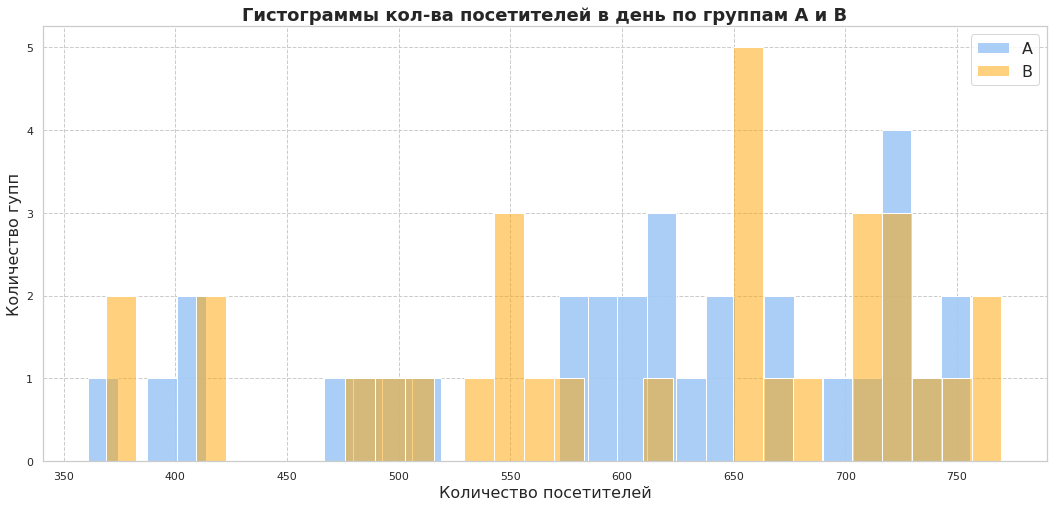

In [7]:
# Определение количества посетителей в каждой группе
visitors_grouped = visitors.groupby('group')['visitors'].sum()
visitors_A = visitors_grouped['A']
visitors_B = visitors_grouped['B']
print()
print()
print(f"Кол-во посетителей в группе А: {visitors_A}\n"
      f"Кол-во посетителей в группе B: {visitors_B}")

# Определение количества покупок в каждой группе
purchases_grouped = orders.groupby('group').size()
purchases_A = purchases_grouped['A']
purchases_B = purchases_grouped['B']
print(f"Кол-во покупок в группе A: {purchases_A}")
print(f"Кол-во покупок в группе B: {purchases_B}")

# Статистический тест
def run_statistical_test(group_a, group_b, alpha=0.05):
    results = stats.mannwhitneyu(group_a, group_b)
    if results.pvalue < alpha:
        print('Разница в количестве посетителей в группах A и B статистически значима\n')
    else:
        print('Разница в количестве посетителей в группах A и B статистически НЕ значима\n')
run_statistical_test(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])

# Определение начальной и полученной конверсий
initial_conversion = purchases_A / visitors_A 
resulting_conversion = purchases_B / visitors_B
print(f"Начальная конверсия: {initial_conversion:.3f}")
print(f"Полученная после изменений конверсия: {resulting_conversion:.3f}")
print(f"Относительное изменение конверсии после изменений: {abs(1-(initial_conversion/resulting_conversion)):.3f}")

# Определение необходимого размера выборки для корректного проведения тестирования
sample_size = 35855
print(f"\nНеобходимый размер выборки для корректного проведения тестирования: {sample_size} посещений.")
print(f"Кол-во посещений в нашем случае: {visitors['visitors'].sum()}")


# Для проверки пересечения пользователя между группами нам надо объединить таблицы orders и visitors по столбцам "visitorid" и "group", 
# чтобы получить таблицу с информацией о количестве посетителей каждой группы вместе с информацией о заказах каждого пользователя.

chekmerge = pd.merge(orders, visitors, on=['group'], how='inner')
print()
# Проверка наличия пересечений
# Эта строка проверяет, есть ли пересечение посетителей (visitorid), которые попали в разные группы теста. 
# Для этого сначала вычисляется количество уникальных visitorid в таблице, полученной в результате объединения таблиц orders и visitors по полю visitorid и group. 
# Затем, метод groupby() группирует эти же данные по visitorid, и далее посчитано количество уникальных групп, в которые попал каждый посетитель. 
# Если количество уникальных групп, в которые попал каждый посетитель, не равно максимальному количеству уникальных групп среди всех посетителей, 
# то значит, что произошло пересечение групп.

if chekmerge['visitorid'].nunique() != chekmerge.groupby('visitorid')['group'].nunique().max():
    
    print('Пересечений пользователей между группами A/B-теста не найдено')
else:
    print('Обнаружено пересечение пользователей между группами A/B-теста')

# Гистограмма количества посетителей в каждой группе
plt.figure(figsize=(18, 8))
sns.histplot(data=visitors[visitors['group']=='A'], x='visitors', bins=30, alpha=0.9, label='A')
sns.histplot(data=visitors[visitors['group']=='B'], x='visitors', bins=30, alpha=0.5, color = 'orange', label='B')
plt.title("Гистограммы кол-ва посетителей в день по группам A и B", fontsize = 18, fontweight='bold')
plt.xlabel('Количество посетителей', fontsize=16)
plt.ylabel('Количество гупп', fontsize=16)
plt.legend(fontsize=16)
plt.show()


**Вывод:** 


Количествово выборки для A/B тестирования подобрано корректно,статистически значимой разницы в количестве посещений между группами не обнаружено.
                                  [Калькулятор который использовался для рассчёта размера выборки](https://www.evanmiller.org/ab-testing/sample-size.html)



#### График кумулятивной выручки по группам

Для начала напишем функцию с помощью которой соберём агрегированные кумулятивные по дням данные о заказах. 

In [8]:
def get_cumulative_data(orders, visitors):
    # создаем массив уникальных пар значений дат и групп теста
    dates_groups = orders[['date','group']].drop_duplicates()
    
    # получаем агрегированные кумулятивные по дням данные о заказах 
    orders_aggregated = (
        dates_groups.apply(lambda x: 
            orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
            .agg({
                'date' : 'max', 
                'group' : 'max', 
                'transactionid' : 'nunique', 
                'visitorid' : 'nunique', 
                'revenue' : 'sum'
            }), 
            axis=1)
        .sort_values(by=['date','group'])
    )
    
    # получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
    visitors_aggregated = (
        dates_groups.apply(lambda x: 
            visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
            .agg({
                'date' : 'max', 
                'group' : 'max', 
                'visitors' : 'sum'
            }), 
            axis=1)
        .sort_values(by=['date','group'])
    )
    
    # объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
    cumulative_data = (
        orders_aggregated
        .merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
        .rename(columns={
            'transactionid': 'orders', 
            'visitorid': 'buyers'
        })
        [['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']]
    )
    
    return cumulative_data

cumulativeData = get_cumulative_data(orders, visitors)

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


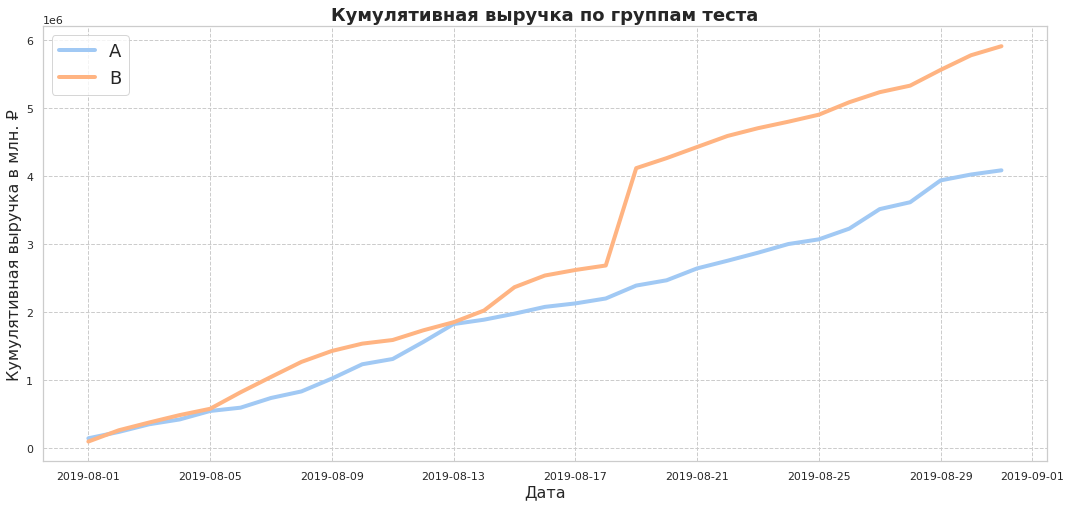

In [9]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'group', 
                                                                     'orders', 'buyers', 
                                                                     'revenue', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'group', 
                                                                     'orders', 'buyers', 
                                                                     'revenue', 'visitors']]

# Строим график выручки группы А
plt.figure(figsize=(18, 8))
sns.lineplot(x='date', y='revenue', data=cumulativeRevenueA, linewidth=4, label='A')
# Строим график выручки группы B
sns.lineplot(x='date', y='revenue', data=cumulativeRevenueB, linewidth=4, label='B')


plt.title('Кумулятивная выручка по группам теста', fontsize=18, fontweight='bold')
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Кумулятивная выручка в млн. ₽', fontsize=16)
plt.legend(fontsize=18)
plt.show()

**Вывод:**


Мы видим, что кумулятивная выручка для обеих групп увеличивается со временем, но выручка группы B выше, чем выручка группы A. Кроме того, у группы B есть резкий рост в середине теста, который не наблюдается у группы A. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.


После 17 августа 2019 года, выручка в обеих группах стабилизировалась и не сильно менялась до конца теста.


####  График кумулятивного среднего чека по группам

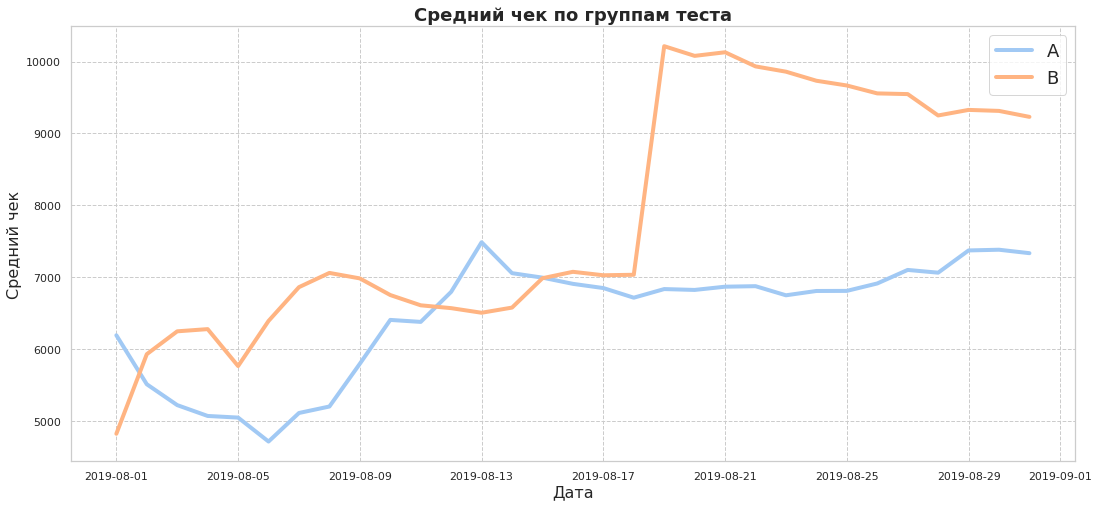

In [10]:
# добавим столбцы с кумулятивным средним чеком по группам в cumulativeData, разделим кумулятивную выручку на кумулятивное число заказов
cumulativeData['rev_avg_a'] =  cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']
cumulativeData['rev_avg_b'] = cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']

# создаем график
plt.figure(figsize=(18, 8))
sns.lineplot(x='date', y='rev_avg_a', data=cumulativeData, linewidth=4, label='A')
sns.lineplot(x='date', y='rev_avg_b', data=cumulativeData, linewidth=4, label='B')

# задаем заголовок и подписи осей
plt.title('Средний чек по группам теста', fontsize=18, fontweight='bold')
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Средний чек', fontsize=16)

# добавляем легенду
plt.legend(fontsize=18)

# показываем график
plt.show()

**Вывод:**

Средний чек по обеим группам растёт со временем. По аналогии с кумулятивной выручкой группа B по итогам теста имеет более высокие значения чем группа А, 9320 против 7333. После 17 августа средний чек группы B начинает резкий рост с пиком в 10200 пунктов. Группа А достигает своего пика в 7485 пунктов 13 августа, после чего снижается и только к концу теста выходит за уровень выше 7000. Очевидно что в группу B несколько дней подряд попадали крупные заказы. Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.


#### График относительного изменения кумулятивного среднего чека группы B к группе A

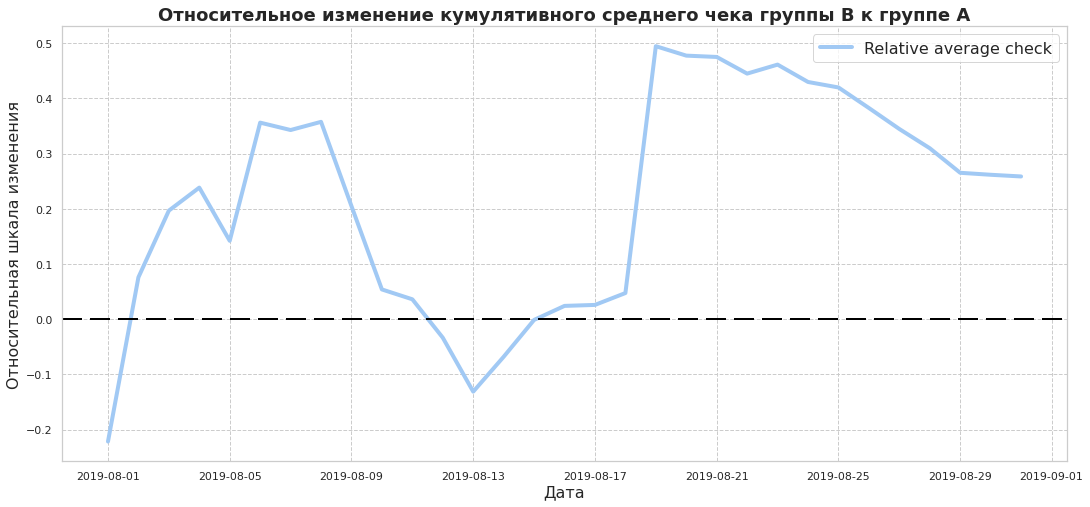

In [11]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

revenue_per_order_A = mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']
revenue_per_order_B = mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']
mergedCumulativeRevenue['rac'] = revenue_per_order_B.div(revenue_per_order_A).sub(1)

# cтроим отношение средних чеков
plt.figure(figsize=(18, 8))
sns.lineplot(x='date', y='rac', data=mergedCumulativeRevenue, linewidth=4, label='Relative average check')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, dashes = (10,4) )


plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=18, fontweight='bold')
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Относительная шкала изменения', fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Вывод:**

- В начале теста (с 1 по 4 августа) средний чек в группе B был ниже, чем в группе A.


- С 5 по 9 августа средний чек в группе B значительно вырос, превысив средний чек группы A.


- Далее (с 10 по 19 августа) средний чек в группе B оставался примерно на том же уровне, что и с 5 по 9 августа, и был значительно выше, чем в группе A.


- С 20 по 31 августа средний чек в группе B продолжал расти и достиг максимального значения (более чем в 2 раза больше среднего чека группы A) 19 августа.


Резкие изменения на графике снова подтверждается наше предположение о наличии значительных изменений в среднем чеке в обеих группах.

#### График кумулятивного среднего количества заказов на посетителя по группам

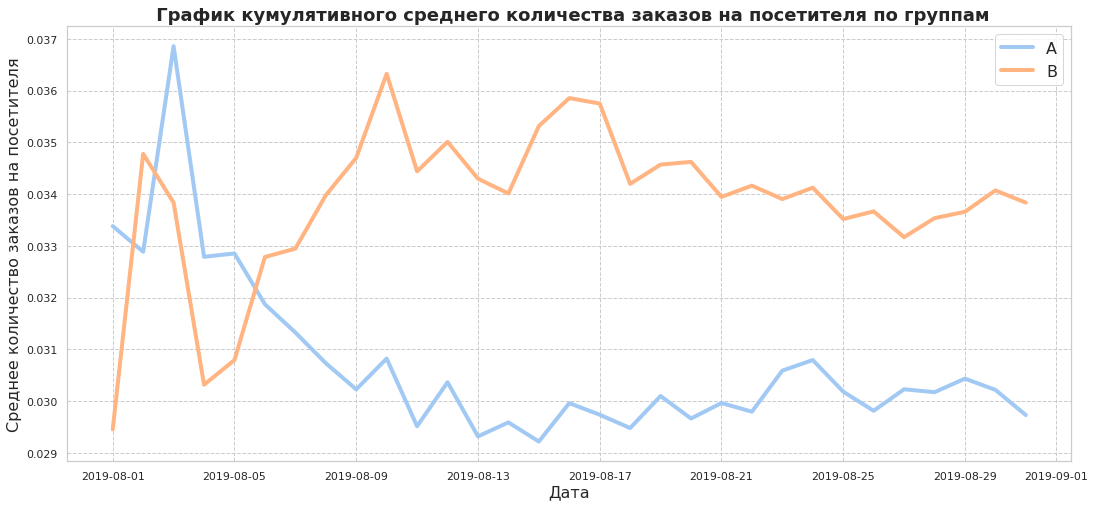

In [12]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# строим график
plt.figure(figsize=(18, 8))
sns.lineplot(x='date', y='conversion', data=cumulativeDataA, label='A', linewidth=4)
sns.lineplot(x='date', y='conversion', data=cumulativeDataB, label='B', linewidth=4)
plt.title(' График кумулятивного среднего количества заказов на посетителя по группам', fontsize=18, fontweight='bold')
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Вывод** 

- В течении первых 10 дней теста среднее количество заказов на посетителя имеет большие колебания по обеим группам. 

- После 10 августа средне количество заказов по обеим группам стабилизируется.


- Для группы A это диапазон от 0.030 до 0.031.
- Для группы B диапазон более высокий, от 0.033 до 0.036
- По итогам теста лидирует группа B

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

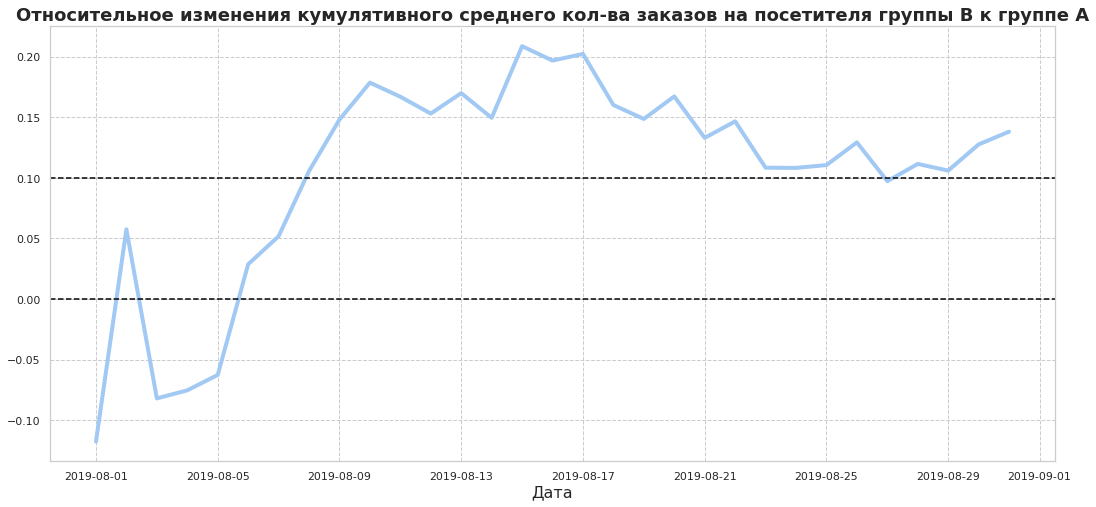

In [13]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', 
                                                                           how='left', suffixes=['A', 'B'])

plt.figure(figsize=(18, 8))
ax = sns.lineplot(data=mergedCumulativeConversions, x='date', 
                  y=mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, linewidth=4)


plt.title('Относительное изменения кумулятивного среднего кол-ва заказов на посетителя группы B к группе A', 
          fontsize=18, fontweight='bold')
ax.axhline(y=0, color='black', linestyle='--')
ax.axhline(y=0.1, color='black', linestyle='--')
plt.xlabel('Дата', fontsize=16)
plt.show()

**Вывод:**

Через неделю после начала тестирования среднее количество заказов на посетителя в группе B остается стабильно на 10% выше, чем в группе A. В середине теста достигается пик разности более чем в 20%. 

### Анализ результатов A/B-теста, анализ выбросов и всплесков.

#### Точечный график количества заказов по пользователям

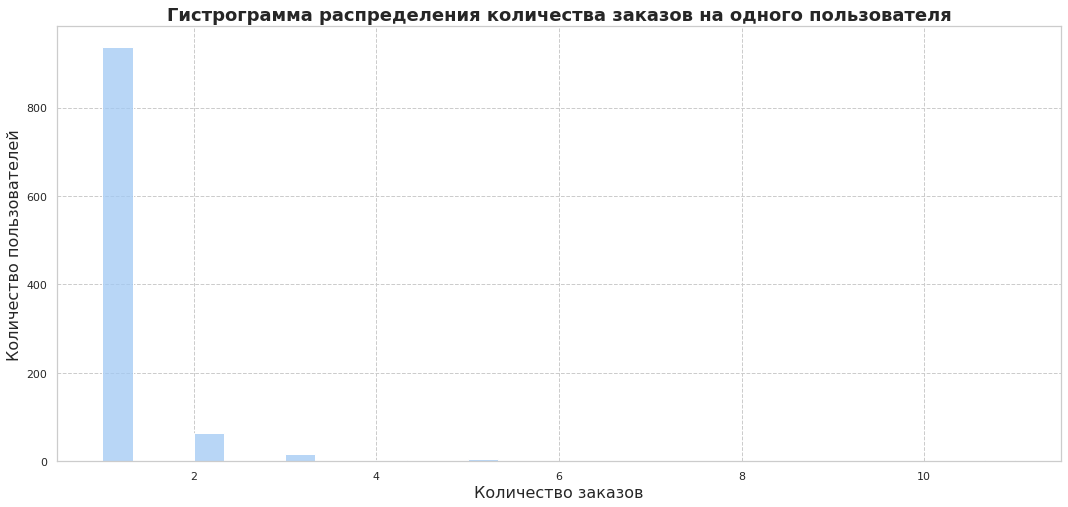

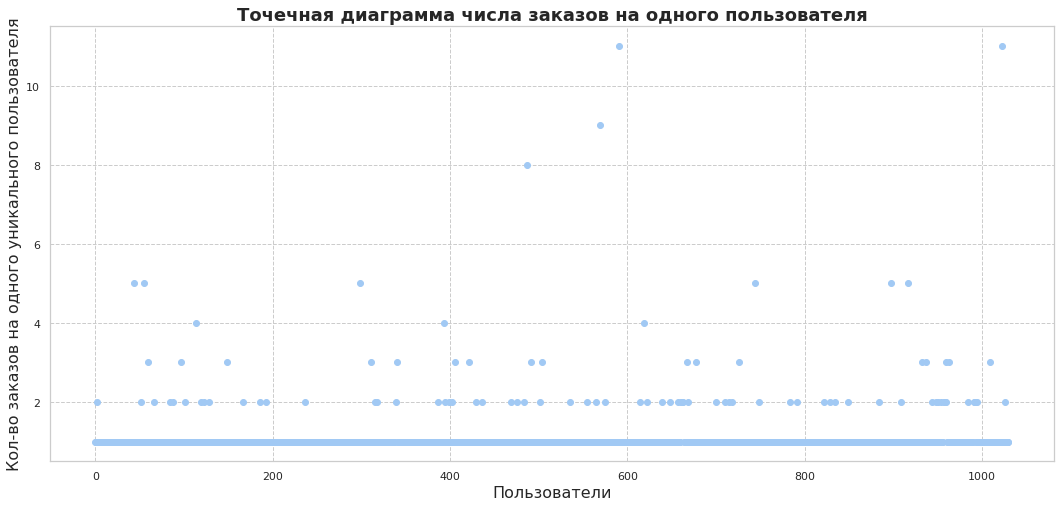

In [14]:
# Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['visitorid', 'orders']


plt.figure(figsize=(18, 8))
ax = sns.histplot(data=ordersByUsers, x='orders', bins=30)
plt.title('Гистрограмма распределения количества заказов на одного пользователя', fontsize=18, fontweight='bold')
plt.xlabel('Количество заказов', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.show()
print()
print()


x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(18,8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя', fontsize=18, fontweight='bold')
plt.xlabel('Пользователи', fontsize=16)
plt.ylabel('Кол-во заказов на одного уникального пользователя', fontsize=16)
plt.show()

**Вывод:**

Судя по графикам, основная масса пользователей совершает не более двух заказов.

#### Определить 95-й и 99-й перцентили количества заказов на пользователя (определить границу для аномальных пользователей)

In [15]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 2.0
99: 4.0


**Вывод:**

- Не более 5% пользователей оформляли больше чем 2 заказа за период теста.

- Не более 1% пользователей оформляли больше чем 4 заказа за период теста.


Можно считать разумным использовать значение в 2 заказа на одного пользователя как верхнюю границу количества заказов и удалить пользователей с числом заказов, превышающим это значение, с целью исключения аномальных данных.

#### Точечный график стоимостей заказов

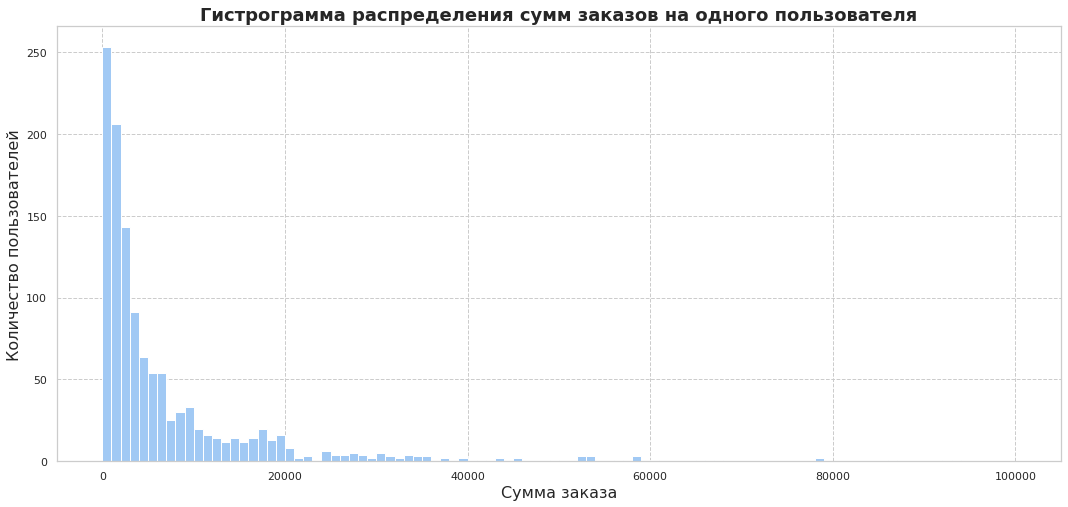

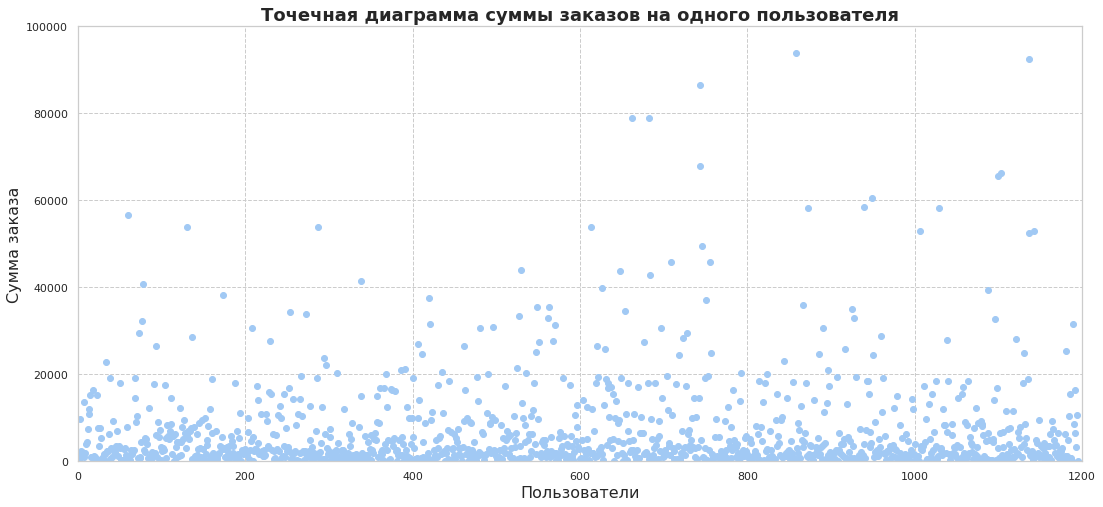

In [16]:
plt.figure(figsize=(18,8))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя', fontsize=18, fontweight='bold')
plt.xlabel('Сумма заказа', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.show()

print()
print()

x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(18,8))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 100000])
plt.title('Точечная диаграмма суммы заказов на одного пользователя', fontsize=18, fontweight='bold')
plt.xlabel('Пользователи', fontsize=16)
plt.ylabel('Сумма заказа', fontsize=16)
plt.show()

**Вывод:**

По обеим графикам можно определить, что основная граница суммы заказов находится ниже 20000. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

#### Определить 95-й и 99-й перцентили стоимости заказов

In [17]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95: {:.0f}\n99: {:.0f}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 28000
99: 58233


**Вывод:**

Не более 5% пользователей оформляли более чем на 28 000 руб  за период теста.

Не более 1% пользователей оформляли более чем на 58 233 руб  за период теста.

Аномальными заказами будем считать те, чья сумма привышает 28 000 руб.

#### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Нулевая гипотеза:** Среднее количество заказов на посетителя между группами A и B по «сырым» данным не различается и любые обнаруженные различия являются случайными.


**Альтернативная гипотеза:** Среднее количество заказов на посетителя между группами A и B по «сырым» данным различается и обнаруженные различия не являются случайными.

In [18]:
# Выбираем данные только для группы A из таблицы заказов, группируем их по пользователям и считаем количество уникальных заказов
def get_orders_by_users(df, group_name):
    orders_by_users = (
        df[df['group']==group_name]
        .groupby('visitorid', as_index=False)
        .agg({'transactionid':'nunique'})
    )
    orders_by_users.columns = ['visitorid', 'orders']
    return orders_by_users


ordersByUsersA = get_orders_by_users(orders, 'A')
ordersByUsersB = get_orders_by_users(orders, 'B')

# Выводим информацию о количестве покупателей, покупках и посетителях для группы A и B
print(f"Кол-во покупателей в группе A: {ordersByUsersA['orders'].count()}")
print(f"Кол-во покупок в группе А: {ordersByUsersA['orders'].sum()}")
print(f"Кол-во посетителей в группе A: {visitors[visitors['group']=='A']['visitors'].sum()}")
print()
print(f"Кол-во покупателей в группе B: {ordersByUsersB['orders'].count()}")
print(f"Кол-во покупок в группе B: {ordersByUsersB['orders'].sum()}")
print(f"Кол-во посетителей в группе B: {visitors[visitors['group']=='B']['visitors'].sum()}")

orders_by_non_purchased_users_A = pd.Series([0]*(visitors[visitors['group']=='A']['visitors'].sum()-ordersByUsersA['orders'].count()), name='orders')
orders_by_non_purchased_users_B = pd.Series([0]*(visitors[visitors['group']=='B']['visitors'].sum()-ordersByUsersB['orders'].count()), name='orders')

# Объединим заказы купивших и не купивших пользователей по группам в соответствующие списки
sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0).reset_index(drop=True)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0).reset_index(drop=True)

alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)

print(f"\nОтносительный прирост конверсии группы B по отношению к группе A: {sampleB.mean()/sampleA.mean()-1:.3f}")
print()
print('P-value: {:.4f}'.format(results.pvalue))

print()
# проверяем статистическую значимость различий в конверсии между группами
if results.pvalue < alpha:
    print('Вывод: Среднее количество заказов на посетителя между группами A и B по «сырым» данным различается, обнаруженные различия статистически значимы.')
else:
    print('Вывод: Среднее количество заказов на посетителя между группами A и B по «сырым» данным не различается, любые обнаруженные различия статистически не значимы.')
    
    

Кол-во покупателей в группе A: 503
Кол-во покупок в группе А: 557
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 586
Кол-во покупок в группе B: 640
Кол-во посетителей в группе B: 18916

Относительный прирост конверсии группы B по отношению к группе A: 0.138

P-value: 0.0168

Вывод: Среднее количество заказов на посетителя между группами A и B по «сырым» данным различается, обнаруженные различия статистически значимы.


**Вывод:**

- Количество покупателей и покупок в группе B больше, чем в группе A, но также общее количество посетителей в группе B немного больше, чем в группе A.


- Относительный прирост количества заказов группы B по отношению к группе A составляет 0.138, что говорит о том, что количество заказов в группе B выше, чем в группе A.


- Значение `p-value` равно 0.0168, что меньше заданного уровня статистической значимости `alpha=0.05`. Это говорит о том, что на основе неочищенных данных есть статистически значимые различия в конверсии между группами A и B.

#### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Нулевая гипотеза:** Средний чек заказа между группами A и B по «сырым» данным не различается и любые обнаруженные различия являются случайными.

**Альтернативная гипотеза:** Средний чек заказа между группами A и B о «сырым» данным различается и обнаруженные различия не являются случайными.

In [19]:

# Относительное изменение среднего чека в группе B по отношению группы A
mean_revenue_A = orders.query('group == "A"')['revenue'].mean()
mean_revenue_B = orders.query('group == "B"')['revenue'].mean()
relative_difference = (mean_revenue_B / mean_revenue_A - 1)
print(f'Относительное изменение среднего чека в группе B по отношению группы A: {relative_difference:.3f}')
print()
# Проверка гипотезы о равенстве средних чеков в группах A и B
results = stats.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])
print('P-value: {:.4f}'.format(results.pvalue))   
print()
if results.pvalue < alpha:
    print('Вывод: Средний чек заказа между группами A и B о «сырым» данным различается и обнаруженные различия статистически значимы.')
else:
    print('Вывод: Средний чек заказа между группами A и B по «сырым» данным не различается и любые обнаруженные различия статистически не значимы.')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259

P-value: 0.7293

Вывод: Средний чек заказа между группами A и B по «сырым» данным не различается и любые обнаруженные различия статистически не значимы.


**Вывод:**


- По результатам проведенного теста можно сделать вывод, что различий в средних чеках в группах A и B нет. Однако относительное изменение среднего чека в группе B по отношению группы A составило 0.259, что говорит о потенциальной тенденции к увеличению среднего чека в группе B.


- При этом статистически значимых различий в средних чеках между группами не обнаружено.

#### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Нулевая гипотеза:** Среднее количество заказов на посетителя между группами A и B не различается и любые обнаруженные различия являются случайными при использовании очищенных данных.

**Альтернативная гипотеза:** Среднее количество заказов на посетителя между группами A и B различается и обнаруженные различия не являются случайными при использовании очищенных данных.

In [20]:
# Зададим предельные кол-во заказов и сумму для формирования списка аномальных пользователей

limit_orders = 2
limit_revenue = 28000


# Посчитаем аномальных пользователей
abnormalUsers = pd.concat([
    ordersByUsersA.query('orders > @limit_orders')['visitorid'],
    ordersByUsersB.query('orders > @limit_orders')['visitorid'],
    orders.query('revenue > @limit_revenue')['visitorid']
]).drop_duplicates().sort_values()

print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

# получаем отфильтрованные выборки по группам A и B
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)

# Вычисляем статистическую значимость различия в среднем количестве заказов
conversion_difference = sampleBFiltered.mean() / sampleAFiltered.mean() - 1
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)


print('\nОтносительный прирост среднего количества заказов группы B по отношению к группе A после очистки данных: {:.3f}'.format(conversion_difference))
print()
print('P-value: {:.4f}'.format(results.pvalue))   
print()
# Выводим результаты теста
if results.pvalue < alpha:
    print('Вывод: Среднее количество заказов на посетителя между группами A и B различается и обнаруженные различия не являются статистически значимыми использовании очищенных данных.')
else:
    print('Вывод: Среднее количество заказов на посетителя между группами A и B не различается и любые обнаруженные различия статистически не значимы *при использовании очищенных данных.')
    
    

Кол-во аномальных пользователей: 74

Относительный прирост среднего количества заказов группы B по отношению к группе A после очистки данных: 0.173

P-value: 0.0130

Вывод: Среднее количество заказов на посетителя между группами A и B различается и обнаруженные различия не являются статистически значимыми использовании очищенных данных.


**Вывод:**

После очистки данных от аномальных пользователей статистически значимое различие в среднем количетсве заказов на посетителя между группами A и B сохраняется и составляет 17.3%, а также `P-value` (вероятность получить такое или еще более выраженное различие случайно) уменьшилось до 0.013, что говорит о высокой достоверности различия.

#### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Нулевая гипотеза:** Средний чек заказа между группами A и B не различается и любые обнаруженные различия являются случайными при использовании очищенных данных. 


**Альтернативная гипотеза:** Средний чек заказа между группами A и B различается и обнаруженные различия не являются случайными при использовании очищенных данных.

In [21]:
# Средний чек по очищенным пользователям
group_a_mean = orders[np.logical_and(orders['group'] == 'A', 
                                     np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()

group_b_mean = orders[np.logical_and(orders['group'] == 'B', 
                                     np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()

relative_difference = (group_b_mean / group_a_mean) - 1
print(f"Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {relative_difference:.3f}")


# Проверка статистической значимости
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', 
                                                   np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', 
                                                   np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])
# Выводим результаты теста
print()
print('P-value: {:.4f}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print('Вывод: Средний чек заказа между группами A и B по «очищенным» данным различается и обнаруженные различия статистически значимы.')
else:
    print('Вывод: Средний чек заказа между группами A и B по «очищенным» данным не различается и любые обнаруженные различия статистически не значимы.')



Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020

P-value: 0.7385

Вывод: Средний чек заказа между группами A и B по «очищенным» данным не различается и любые обнаруженные различия статистически не значимы.


**Вывод:**

После очистки данных от аномальных пользователей, относительное изменение среднего чека группы B по отношению к группе A составило -0.020, что говорит о том, что в группе B средний чек стал меньше по сравнению с группой A. Однако, разница в средних чеках между группами не является статистически значимой (`P-value` = 0.7385), что может свидетельствовать о том, что различия между группами случайны. Таким образом, можно сделать вывод, что изменение среднего чека не оказало существенного влияния на конверсию между группами.

### Решение по результатам теста

**Варианты принимаемых решений:**

- **Остановить тест, зафиксировать победу одной из групп.**


- <strike>Остановить тест, зафиксировать отсутствие различий между группами.</strike>
- <strike>Продолжить тест.<strike>





В итоге, после проведения A/B теста мы получили следующие результаты по кумулятивной метрике: по выручке, среднему чеку и среднему количеству заказов на пользователя, что практически на протяжении всего теста лидирует группа B. Сомнения появились из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей, но после этого разница между средними чеками стала минимальной. По неочищенным данным различий в средних чеках в группах A и B не было, однако после очистки данных разница между средними чеками стала незначительной. 


До и после очистки данных, показатель среднего количества заказов в группе B превосходит показатель в группе A - сначала на 13.8%, а после очистки данных на 17.3%. Данная разница показателей среднего количества заказов между группами является статистически значимой, что позволяет нам сделать вывод о том, что мы можем **остановить наш A/B тест и зафиксировать победу группы B!** Более того, мы исключили возможность подглядывания в результаты и подтвердили корректность размера выборки данных.